In [486]:
import json
import py.myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams['agg.path.chunksize'] = 10000

recalculate = recompile = True

In [487]:
def set_ticks(ax_all, N=6, cut_x = 0.15, cut_y = 0.2):
    for ax in ax_all:
        ax.tick_params(axis='both', labelsize=6)
        ax.margins(x=0.)

        box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        box_w = box.width
        box_h = box.height

        if ax.get_xscale() == "log":
            ax.xaxis.set_major_locator(ticker.LogLocator(numticks=N))
        else:
            ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=N))

        if ax.get_yscale() == "log":
            ax.yaxis.set_major_locator(ticker.LogLocator(numticks=N))
            ax.yaxis.set_minor_locator(ticker.LogLocator(subs="auto", numticks=10))
        else:
            ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=N))

        (x0, x1) = ax.get_xlim()
        (y0, y1) = ax.get_ylim()


        x0 = ax.dataLim.x0
        x1 = ax.dataLim.x1
        y0 = ax.dataLim.y0
        y1 = ax.dataLim.y1



        axis_to_data = ax.transAxes + ax.transData.inverted()
        (x2, y2) = axis_to_data.transform([1 - cut_x/box.width, 1 - cut_y/box.height])
        (x0, y0) = axis_to_data.transform([-0.1, -0.1])

        # print(x0, x1, x2)
        # print(y0, y1, y2)


        ax.set_xticks([tick for tick in ax.get_xticks() if tick <= x2])
        ax.set_yticks([tick for tick in ax.get_yticks() if tick >= y0 and tick <= y2])

        # print(ax.get_yticklabels())

        if ax.get_yscale() == "log":       
            ax.set_yticklabels([label.get_text().replace("-", "\\mbox{-}") for label in ax.get_yticklabels()])
        # print(ax.get_yticklabels())

def set_labels(ax, x_label, y_label):
    box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    
    if x_label:
        ax.text(1, -0.05/box.height, x_label, transform=ax.transAxes, va="top", ha="right")
    if y_label:
        ax.text(-0.03/box.width, 1,  y_label, transform=ax.transAxes, va="top", ha="right")

## Relay1

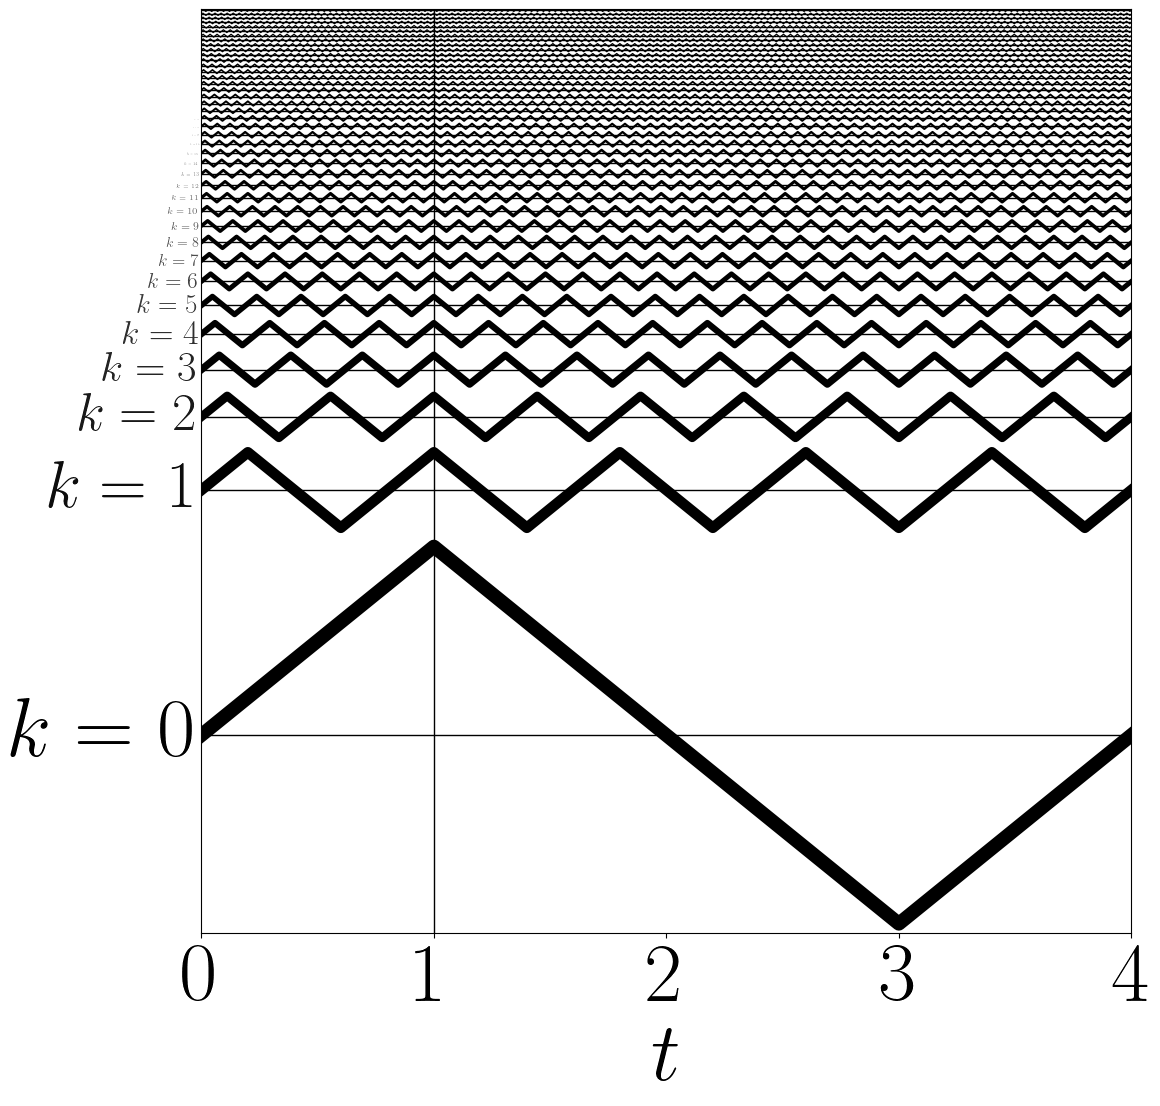

In [489]:
# x' = -\sign(x-1)

fig = plt.figure(figsize=(12, 12),dpi=100)

gs = GridSpec(nrows=1, ncols=1)

ax  = plt.subplot(gs[0,0])

N = 100
colors = ['k', 'b', 'r', 'lime', 'orange']
h = 0
ticks = []
ticklabels = []
for k in range(40):
    ts = []
    xs = []
    ax.axhline(h,c='k',lw=1)
    ticks.append(h)
    # ticklabels.append()
    
    if k < 20:
        ax.text(-0.01, h, f"$k = {k}$", va="center", ha="right", fontsize = 60*0.8**k, alpha = 0.95**k)
    
    for i in range(0, (4*k+1)*6, 4):
        ts += [(i -1)/(4*k+1), (i+1)/(4*k+1)]
        xs += [h+(-1)/(4*k+1), h+(1)/(4*k+1)]
    ax.plot(ts, xs, c='k', lw=10/(1+0.3*k))
    h += 1/(4*k+1)+1/(4*k+1+4)+0.1/(1+0.3*k)
    
ax.axvline(1,c='k',lw=1)
    
    
ax.set_xlim(0, 4)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))


ax.tick_params(axis='both', labelsize=60)

N = 10

ax.tick_params(labelleft=False, left=False)
# ax.set_yticks(ticks)
ax.margins(y=0.0)
ax.set_xlabel("$t$", fontsize=60)
ax.dataLim.y0 = -1.05

# set_ticks([ax], N=5)
# set_labels(ax, "$t$", "$x(t)$")
plt.savefig(f"output_img/relay1_illustartion.pdf", format="pdf", dpi=100,bbox_inches='tight',pad_inches=0.01,transparent=True)


In [ ]:
params = dict(
    eq = 'Relay1',
     b = 1,
    d0 = 1,
    d1 = -0.6,
    tau = 1,
    
    h = 0.1,
    t_finish = 1000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
t, le, x = my.get_binary(filename_bin).T

In [ ]:
fig = plt.figure(figsize=(8,2),dpi=1000)

gs = GridSpec(nrows=2, ncols=2, width_ratios=[2, 2], height_ratios=[3,1],hspace=0.1)

ax_sol  = plt.subplot(gs[:,0])
ax_le   = plt.subplot(gs[0,1])
ax_le_std = plt.subplot(gs[1,1], sharex = ax_le)


ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+1,x,'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 20)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)

ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/2;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_le, ax_le_std]
for ax in ax_all:
    ax.tick_params(axis='both', labelsize=6)
    ax.margins(x=0.)
    
    box = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    box_w = box.width
    box_h = box.height
    
    N = 5
    if ax.get_xscale() == "log":
        ax.xaxis.set_major_locator(ticker.LogLocator(numticks=N))
    else:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=N))
    
    if ax.get_yscale() == "log":
        ax.yaxis.set_major_locator(ticker.LogLocator(numticks=N))
    else:
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=N))
    
    (x0, x1) = ax.get_xlim()
    (y0, y1) = ax.get_ylim()
    
    
    x0 = ax.dataLim.x0
    x1 = ax.dataLim.x1
    y0 = ax.dataLim.y0
    y1 = ax.dataLim.y1
    

    print(box.width, box.height)
    
    axis_to_data = ax.transAxes + ax.transData.inverted()
    (x2, y2) = axis_to_data.transform([1 - 0.15/box.width, 1 - 0.15/box.height])
    (x0, y0) = axis_to_data.transform([-0.1, -0.1])
    
    print()
    # print(x0, x1, x2)
    # print(y0, y1, y2)
    
   
    ax.set_xticks([tick for tick in ax.get_xticks() if tick <= x2])
    ax.set_yticks([tick for tick in ax.get_yticks() if tick >= y0 and tick <= y2])
    
    # print(ax.get_yticklabels())

    if ax.get_yscale() == "log":       
        ax.set_yticklabels([label.get_text().replace("-", "\\mbox{-}") for label in ax.get_yticklabels()])
    # print(ax.get_yticklabels())
    
ax_sol.set_xlabel("$t$",loc="right",labelpad=0, va="bottom")
ax_sol.set_ylabel("$x(t)$",rotation=0,loc="top",labelpad=-20, va='top')
ax_le_std.set_xlabel("$t$",loc="right",labelpad=0, va="bottom")
ax_le.set_ylabel("$\lambda(t)$", rotation=0, loc="top", labelpad=-20, va='top')
ax_le_std.set_ylabel("$\sigma(t)$", rotation=0, loc="top", labelpad=-15, va='center')

plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000,bbox_inches='tight')


## Relay2

### Lorenz picture

In [ ]:
recompile = False
params = dict(
    eq = 'Relay2',
     b = -0.2,
     c = 1, d = 1, x0=0, v0 = 1, tau = 1,
     h=0.01, t_finish = 50000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
output = my.get_binary(filename_bin)
t = output.T[0]
le = output.T[1]
x = output[:, 2:].T

In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=3, width_ratios=[2, 1, 2], height_ratios=[3,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
ax_le   = plt.subplot(gs[0,2])
ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+params["tau"],x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 200)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

# step = int(10*len(t)/params["t_finish"])
# for i in range(0, len(t), step):
#     ax_sol2.plot(x[0][i:i+step], x[1][i:i+step], 'k', lw=0.05, alpha=0.01)
    
ax_sol2.plot(x[0], x[1],'k',lw=0.005, rasterized=True)
# ax_sol2.plot(x[0], x[1],'k',lw=0.5, alpha=0.01)
# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)


ax_sol2.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol2.axvline(0,linestyle=':',c='k',lw=0.3)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]
set_ticks(ax_all, N=4, cut_x = 0.3)

ax_sol2.margins(x=0.05,y=0.05)


set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_sol2, "$x(t)$", "$\dot x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01,transparent=True)


### Cycle

In [ ]:
recompile = False
params = dict(
    eq = 'Relay2',
     b = -0.2,
     c = 3, d = 3, x0=0., v0 = 1.5, tau = 1,
     h=0.01, t_finish = 5000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
output = my.get_binary(filename_bin)
t = output.T[0]
le = output.T[1]
x = output[:, 2:].T

In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)

# gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,2],hspace=0.15,wspace=0.25)
gs = GridSpec(nrows=2, ncols=3, width_ratios=[2, 1, 2], height_ratios=[3,2],hspace=0.15,wspace=0.25)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
ax_le   = plt.subplot(gs[0,2])
ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+params["tau"],x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 50)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

ax_sol2.plot(x[0], x[1],'k',lw=0.2)
ax_sol2.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol2.axvline(0,linestyle=':',c='k',lw=0.3)

# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]
set_ticks(ax_all, N=4, cut_x = 0.3)

ax_sol2.margins(x=0.05,y=0.05)


set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_sol2, "$x(t)$", "$\dot x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01)


### Rosler picture

In [ ]:
params = dict(
    eq = 'Relay2',
     b = -0.02,
     c = 1, d = 1, x0=0, v0 = 2, tau = 1,
     h=0.01, t_finish = 100
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
output = my.get_binary(filename_bin)
t = output.T[0]
le = output.T[1]
x = output[:, 2:].T

In [ ]:
fig = plt.figure(figsize=(8,2),dpi=1000)

gs = GridSpec(nrows=2, ncols=3, width_ratios=[1, 1, 1.3], height_ratios=[3,1],hspace=0.1)

ax_sol  = plt.subplot(gs[:,0])
ax_sol2  = plt.subplot(gs[:,1])
ax_le   = plt.subplot(gs[0,2])
ax_le_std = plt.subplot(gs[1,2], sharex = ax_le)


ax_sol.plot(t,x[0],'k',lw=0.5)
ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 500)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

ax_sol2.plot(x[0], x[1],'k',lw=0.001)
# ax_sol.plot(t+1,x[0],'k',lw=0.3, linestyle=":")
# ax_sol.set_xlim(0, 200)
# # ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
# ax_le.plot(t, le, 'k', lw=0.5)
# ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_sol2, ax_le, ax_le_std]

for ax in ax_all:
    ax.tick_params(axis='both', labelsize=6)
    ax.margins(x=0.)
    
    N = 5
    if ax.get_xscale() == "log":
        ax.xaxis.set_major_locator(ticker.LogLocator(numticks=N))
    else:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=N))
    
    if ax.get_yscale() == "log":
        ax.yaxis.set_major_locator(ticker.LogLocator(numticks=N))
    else:
        ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=N))
    
    (x0, x1) = ax.get_xlim()
    (y0, y1) = ax.get_ylim()
    
    
    x0 = ax.dataLim.x0
    x1 = ax.dataLim.x1
    y0 = ax.dataLim.y0
    y1 = ax.dataLim.y1
    

    
    axis_to_data = ax.transAxes + ax.transData.inverted()
    (x2, y2) = axis_to_data.transform([0.9, 0.9])
    (x0, y0) = axis_to_data.transform([-0.1, -0.1])
    
    print()
    print(x0, x1, x2)
    print(y0, y1, y2)
    
   
    ax.set_xticks([tick for tick in ax.get_xticks() if tick <= x2])
    ax.set_yticks([tick for tick in ax.get_yticks() if tick >= y0 and tick <= y2])
    
    # print(ax.get_yticklabels())

    if ax.get_yscale() == "log":       
        ax.set_yticklabels([label.get_text().replace("-", "\\mbox{-}") for label in ax.get_yticklabels()])
    # print(ax.get_yticklabels())
    
ax_sol2.margins(x=0.1,y=0.1)
    
    
ax_sol.set_xlabel("$t$",loc="right",labelpad=0, va="bottom")
ax_sol.set_ylabel("$x(t)$",rotation=0,loc="top",labelpad=-20, va='top')

ax_sol2.set_xlabel("$x(t)$",loc="right",labelpad=0, va="bottom")
ax_sol2.set_ylabel("$\dot x(t)$",rotation=0,loc="top",labelpad=-20, va='top')

ax_le.set_ylabel("$\lambda(t)$", rotation=0, loc="top", labelpad=-20, va='top')
ax_le_std.set_xlabel("$t$",loc="right",labelpad=0, va="bottom")
ax_le_std.set_ylabel("$\sigma(t)$", rotation=0, loc="top", labelpad=-17, va='top')




## Random walk equation

### Random case

In [ ]:
recompile = False

params = dict(
    eq = 'RandomWalk',
     b = 0.1,
    d0 = -1,
    d1 =  1,
    tau = 20,
    
    x0 = 5,
    
    h = 0.01,
    t_finish = 100000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
t, le, x = my.get_binary(filename_bin).T

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
le_final = np.mean(le[-window:])


In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)


gs = GridSpec(nrows=2, ncols=2, width_ratios=[2, 2], height_ratios=[3,2],hspace=0.15,wspace=0.15)

ax_sol  = plt.subplot(gs[:,0])
ax_le   = plt.subplot(gs[0,1])
ax_le_std = plt.subplot(gs[1,1], sharex = ax_le)


ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+params["tau"],x,'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 500)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)

ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = max(le_delta1, le_delta2)/8;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.4g}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_le, ax_le_std]
set_ticks(ax_all)

set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01)



### Cycle case

In [ ]:
recompile = False

params = dict(
    eq = 'RandomWalk',
     b = 0.1,
    d0 = -1,
    d1 =  1,
    tau = 10,
    
    x0 = 5,
    
    h = 0.01,
    t_finish = 50000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
t, le, x = my.get_binary(filename_bin).T

In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)

gs = GridSpec(nrows=2, ncols=2, width_ratios=[2, 2], height_ratios=[3,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[:,0])
ax_le   = plt.subplot(gs[0,1])
ax_le_std = plt.subplot(gs[1,1], sharex = ax_le)



ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+params["tau"],x,'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 500)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)

ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2);
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.8f}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_le, ax_le_std]
set_ticks(ax_all)

set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01)




## Makey Glass

In [ ]:
recompile = True

params = dict(
    eq = 'MakeyGlass',
     b = 0.9,
    d0 = 2,
    d1 =  0,
    tau = 10,
    x0 = 0.2,
    v0 = 2,
    h = 0.01,
    t_finish = 10000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
t, le, x = my.get_binary(filename_bin).T

In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)


gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 2], height_ratios=[3,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[:,0])
# ax_sol2 = plt.subplot(gs[1,0], sharex = ax_sol)
ax_le   = plt.subplot(gs[0,1])
ax_le_std = plt.subplot(gs[1,1], sharex = ax_le)


ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+params["tau"],x,'k',lw=0.3, linestyle=":")
start = 0
ax_sol.set_xlim(start, start+ 100)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol.axhline(1,linestyle=':',c='k',lw=0.3)

ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/4;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])


ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.8f}$',va="bottom", ha="right")

ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)


ax_all = [ax_sol, ax_le, ax_le_std]

set_ticks(ax_all)

set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01)


In [ ]:
recompile = False

params = dict(
    eq = 'MakeyGlass',
     b = 0.5,
    d0 = 2,
    d1 =  0,
    tau = 10,
    x0 = 0.2,
    v0 = 2,
    h = 0.001,
    t_finish = 5000
)

script = "ddes_test"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# fig, ax = plt.subplots(1,3, figsize=(8,7/3),dpi=1000)
t, le, x = my.get_binary(filename_bin).T

# x = np.exp(y)
# y = np.log(x)


In [ ]:
fig = plt.figure(figsize=(8,1.25),dpi=1000)

gs = GridSpec(nrows=2, ncols=2, width_ratios=[3, 2], height_ratios=[3,2],hspace=0.15,wspace=0.2)

ax_sol  = plt.subplot(gs[:,0])
# ax_sol2 = plt.subplot(gs[1,0], sharex = ax_sol)
ax_le   = plt.subplot(gs[0,1])
ax_le_std = plt.subplot(gs[1,1], sharex = ax_le)



# ax_sol2.plot(t,y,'k',lw=0.5)
# ax_sol2.plot(t+1,y,'k',lw=0.3, linestyle=":")
# ax_sol2.axhline(0,linestyle=':',c='k',lw=0.3)

ax_sol.plot(t,x,'k',lw=0.5)
ax_sol.plot(t+params["tau"],x,'k',lw=0.3, linestyle=":")
ax_sol.set_xlim(0, 200)
ax_sol.axhline(0,linestyle=':',c='k',lw=0.3)
ax_sol.axhline(1,linestyle=':',c='k',lw=0.3)


# ax_sol.tick_params(labelbottom=False)


ax_le.plot(t, le, 'k', lw=0.5)
ax_le.tick_params(labelbottom=False)

le_mean = np.mean(le)
le_delta1 = np.max(le - le_mean);
le_delta2 = np.max(le_mean - le);
le_delta = min(le_delta1, le_delta2)/8;
ax_le.dataLim.y0 = le_mean - le_delta;
ax_le.dataLim.y1 = le_mean + le_delta;

window = len(le)//10
le_std = pd.Series(le).rolling(window=window).std()
ax_le_std.plot(t, le_std, 'k', lw=0.5)
ax_le_std.set_yscale("log")
le_final = np.mean(le[-window:])



ax_le.axhline(le_final,linestyle=':',c='k',lw=0.3)

ax_le.text(x=np.max(t), y=le_final+le_delta*0.1, s=f'$\\lambda(t_f) \\approx {le_final:.8f}$',va="bottom", ha="right")


ax_all = [ax_sol, ax_le, ax_le_std]

set_ticks(ax_all)

set_labels(ax_sol, "$t$", "$x(t)$")
set_labels(ax_le, None, "$\lambda(t)$")
set_labels(ax_le_std, "$t$", "$\sigma(t)$")

plt.savefig(f"output_img/{filename}.pdf", format="pdf", dpi=1000,bbox_inches='tight',pad_inches=0.01)



# Non-degeneracy counter examples

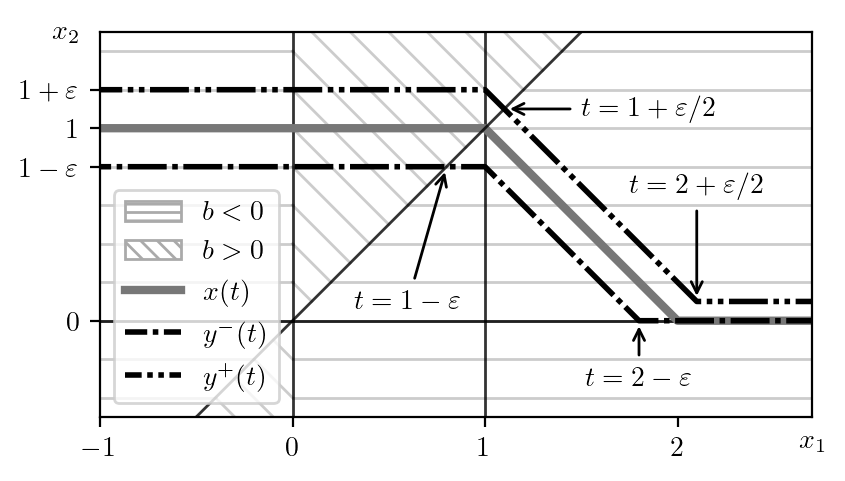

In [1042]:
# x' = -\sign(x-1)

fig = plt.figure(figsize=(5, 2.5),dpi=200)

gs = GridSpec(nrows=1, ncols=1)

ax  = plt.subplot(gs[0,0])

ax.set_ylim(-0.5, 1.5)
ax.set_xlim(-1, 2.7)

N = 5
L = 4
xs = np.linspace(0, L, L*N+1)
for i in range(L*N+1):
    lw = 1
    alpha = 0.2
    ax.plot([0, xs[i]/2], [xs[i], xs[i]/2], c='k', lw=lw, alpha=alpha)
    ax.plot([0, -1], [xs[i], xs[i]], c='k', lw=lw, alpha=alpha)
    ax.plot([xs[i], 3], [xs[i], xs[i]], c='k', lw=lw, alpha=alpha)
    
    ax.plot([0, -xs[i]/2], [-xs[i], -xs[i]/2], c='k', lw=lw, alpha=alpha)
    ax.plot([0, 3], [-xs[i], -xs[i]], c='k', lw=lw, alpha=alpha)
    ax.plot([-xs[i], -1], [-xs[i], -xs[i]], c='k', lw=lw, alpha=alpha)

    
epsilon = 0.2

x0, = ax.plot(*np.array([(-1,1), (1,1), (2,0), (3,0)]).T, c='#777777', lw=3, label="$x(t)$")

x1, = ax.plot(*np.array([(-1,1 + epsilon), (1,1 + epsilon), 
                         (2+epsilon/2, epsilon/2), (3,epsilon/2)]).T, 
                          c='k', lw=2, linestyle=(-5, (1,1,1,1,7,1)))
# ax.plot(*np.array([(-1,1 - epsilon), (1,1 - epsilon), (2-epsilon, 0), (3,0)]).T, c='w', lw=1, linestyle='solid')

# ax.plot(*np.array([(-1,1 - epsilon), (1,1 - epsilon), (2-epsilon, 0), (3,0)]).T, c='w', lw=1, linestyle='solid')
x2, = ax.plot(*np.array([(-1,1 - epsilon), (1,1 - epsilon), (2-epsilon, 0), (3,0)]).T, 
              c='k', lw=2, linestyle=(-3, (1,1,7,1)))



# colors = ['k', 'b', 'r', 'lime', 'orange']
# h = 0
# ticks = []
# ticklabels = []
# for k in range(40):
#     ts = []
#     xs = []
#     ax.axhline(h,c='k',lw=1)
#     ticks.append(h)
#     # ticklabels.append()
    
#     if k < 20:
#         ax.text(-0.01, h, f"$k = {k}$", va="center", ha="right", fontsize = 60*0.8**k, alpha = 0.95**k)
    
#     for i in range(0, (4*k+1)*6, 4):
#         ts += [(i -1)/(4*k+1), (i+1)/(4*k+1)]
#         xs += [h+(-1)/(4*k+1), h+(1)/(4*k+1)]
#     ax.plot(ts, xs, c='k', lw=10/(1+0.3*k))
#     h += 1/(4*k+1)+1/(4*k+1+4)+0.1/(1+0.3*k)
    
ax.axhline(0,c='k',lw=1, alpha=0.8,zorder=-10)
ax.axvline(0,c='k',lw=1, alpha=0.8,zorder=-10)
ax.axvline(1,c='k',lw=1, alpha=0.8,zorder=-10)
ax.plot([-10,10],[-10,10],c='k',lw=1, alpha=0.8)
ax.set_aspect('equal', 'box')
# ax.plot([0, 1], [0, 1])

ax.set_yticks([0, 1, 1+epsilon, 1 - epsilon], labels=[0,1,r"$1 + \varepsilon$", r"$1 - \varepsilon$"])

ax.annotate("$t = 1 - \\varepsilon$", xy=(1-epsilon, 1-epsilon), ha='center',va='center', xytext=(1-epsilon-0.2, 0.1), arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate("$t = 2 - \\varepsilon$", xy=(2-epsilon, 0), ha='center', va='center', xytext=(2-epsilon, -0.3), arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate("$t = 1 + \\varepsilon/2$", xy=(1+epsilon/2, 1+epsilon/2), va='center', xytext=(1.5, 1+epsilon/2), arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate("$t = 2 + \\varepsilon/2$", xy=(2+epsilon/2, epsilon/2), ha='center',va='center', xytext=(2+epsilon/2, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=10)
    
    
ax.text(1, -0.03, "$x_1$", transform=ax.transAxes, va="top", ha="center")
ax.text(-0.03, 1.0,  "$x_2$", transform=ax.transAxes, va="center", ha="right")
# ax.set_xlim(0, 4)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))


# ax.tick_params(axis='both', labelsize=60)

# N = 10

# ax.tick_params(labelleft=False, left=False)
# ax.set_yticks(ticks)
# ax.margins(y=0.0)
# ax.set_xlabel("$t$", fontsize=60)
# ax.dataLim.y0 = -1.05

# ax.set_xlabel("$x_1$",loc="right",labelpad=12, va="bottom", )
# ax.set_ylabel("$x_2$",loc="right",labelpad=0, va="bottom")


# set_ticks([ax], N=5)
# set_labels(ax, "$t$", "$x(t)$")





a_val = 0.6

circ1 = Patch(facecolor="w",edgecolor='#AAAAAA',hatch=r'\\\\',label='$b > 0$')
circ2= Patch(facecolor="w", edgecolor='#AAAAAA',hatch='----',label='$b < 0$')

x1, = ax.plot([0],[0],c='k', lw=2, linestyle=(0, (4,1,1,1,7,1)), label="$y^{-}(t)$")
x2, = ax.plot([0],[0],c='k', lw=2, linestyle=(0, (3,1,1,1,1,1,7,1)), label="$y^{+}(t)$")
ax.legend(handles = [circ2,circ1,x0,x1,x2],loc=3)


plt.savefig(f"output_img/DegeneracyNonOverlapping.pdf", format="pdf", dpi=100,bbox_inches='tight',pad_inches=0.01,transparent=True)


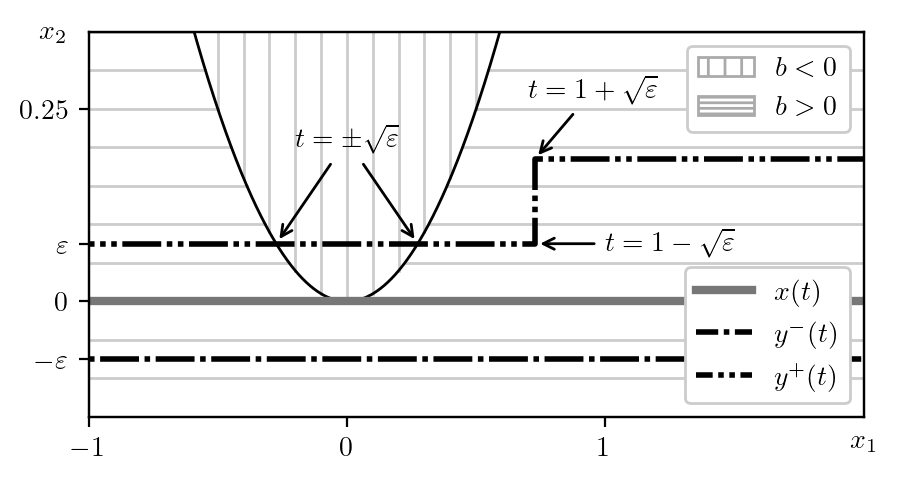

In [1034]:
# x' = -\sign(x-1)

fig = plt.figure(figsize=(5, 2.5),dpi=200)

gs = GridSpec(nrows=1, ncols=1)

ax  = plt.subplot(gs[0,0])

ax.set_ylim(-0.15, 0.35)
ax.set_xlim(-1, 2)

t = np.linspace(-1,1, 1000)
x = t**2

ax.plot(t, x, c='k', lw = 1)

N = 20
L = 1
xs = np.linspace(-L, L, 2*L*N+1)
for i in range(2*L*N+1):
    lw = 1
    alpha = 0.2
    
    if xs[i] > 0:
        ax.plot([-1, -np.sqrt(xs[i])], [xs[i],xs[i]], c='k', lw=lw, alpha=alpha)
        ax.plot([ 2,  np.sqrt(xs[i])], [xs[i],xs[i]], c='k', lw=lw, alpha=alpha)
    else:
        ax.plot([-1, +2], [xs[i],xs[i]], c='k', lw=lw, alpha=alpha)
        
    ax.plot( [2*xs[i],2*xs[i]], [4*xs[i]**2, 1], c='k', lw=lw, alpha=alpha)
    

    
epsilon = 0.075

x0, = ax.plot(*np.array([(-1,0), (2,0)]).T, c='#777777', lw=3, label="$x(t)$")

x2, = ax.plot(*np.array([(-1,-epsilon), (2,-epsilon)]).T, lw=2,c='k', linestyle=(0, (1,1,7,1)), label="$y^-(t)$")
x1, = ax.plot(*np.array([(-1,+epsilon), 
                   (1-np.sqrt(epsilon),+epsilon), 
                   (1-np.sqrt(epsilon), epsilon + 0.2*2*np.sqrt(epsilon)), 
                   (2, epsilon + 0.2*2*np.sqrt(epsilon))]).T, c='k', lw=2, linestyle=(-2, (1,1,1,1,7,1)), label="$y^+(t)$")


# ax.plot(*np.array([(-1,1 + epsilon), (1,1 + epsilon), (2+epsilon/2, epsilon/2), (3,epsilon/2)]).T, c='b', lw=2)
# ax.plot(*np.array([(-1,1 - epsilon), (1,1 - epsilon), (2-epsilon, 0), (3,0)]).T, c='b', lw=2, linestyle='--')
# colors = ['k', 'b', 'r', 'lime', 'orange']
# h = 0
# ticks = []
# ticklabels = []
# for k in range(40):
#     ts = []
#     xs = []
#     ax.axhline(h,c='k',lw=1)
#     ticks.append(h)
#     # ticklabels.append()
    
#     if k < 20:
#         ax.text(-0.01, h, f"$k = {k}$", va="center", ha="right", fontsize = 60*0.8**k, alpha = 0.95**k)
    
#     for i in range(0, (4*k+1)*6, 4):
#         ts += [(i -1)/(4*k+1), (i+1)/(4*k+1)]
#         xs += [h+(-1)/(4*k+1), h+(1)/(4*k+1)]
#     ax.plot(ts, xs, c='k', lw=10/(1+0.3*k))
#     h += 1/(4*k+1)+1/(4*k+1+4)+0.1/(1+0.3*k)
    
# ax.axhline(0,c='k',lw=1, alpha=0.8,zorder=-10)
# ax.axvline(0,c='k',lw=1, alpha=0.8,zorder=-10)
# ax.axvline(1,c='k',lw=1, alpha=0.8,zorder=-10)
# ax.plot([-10,10],[-10,10],c='k',lw=1, alpha=0.8)
# ax.set_aspect('equal', 'box')


# ax.plot([0, 1], [0, 1])
ax.set_xticks([0, -1, 1])

ax.set_yticks([0, epsilon, - epsilon, 0.25], labels=[0,r"$ \varepsilon$", r"$- \varepsilon$",0.25])

ax.annotate(r"$t = \pm \sqrt{\varepsilon}$", xy=(-epsilon**0.5, epsilon),alpha=0, ha='center', xytext=(0, 0.2), arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate(r"$t = \pm \sqrt{\varepsilon}$", xy=(epsilon**0.5, epsilon), ha='center', xytext=(0, 0.2), arrowprops=dict(arrowstyle="->"), fontsize=10)

ax.annotate(r"$t = 1 - \sqrt{\varepsilon}$", xy=(1 - epsilon**0.5, epsilon), va='center', xytext=(1, epsilon), arrowprops=dict(arrowstyle="->"), fontsize=10)
ax.annotate(r"$t = 1 + \sqrt{\varepsilon}$", xy=(1 - epsilon**0.5, epsilon + 0.2*2*np.sqrt(epsilon)), va='bottom', xytext=(0.7, epsilon+ 0.33*2*np.sqrt(epsilon)), arrowprops=dict(arrowstyle="->"), fontsize=10)
# ax.annotate(r"$t = 1 + \sqrt{\varepsilon}$", xy=(1 - epsilon**0.5, epsilon + 0.2*2*np.sqrt(epsilon)), va='center', xytext=(1, 0.1+ epsilon + 0.2*2*np.sqrt(epsilon)), arrowprops=dict(arrowstyle="->"), fontsize=10)
# ax.annotate("$t = 2 - \\varepsilon$", xy=(2-epsilon, 0), ha='center', xytext=(2-epsilon, -0.4), arrowprops=dict(arrowstyle="->"), fontsize=10)
# ax.annotate("$t = 1 + \\varepsilon/2$", xy=(1+epsilon/2, 1+epsilon/2), va='center', xytext=(1.5, 1+epsilon/2), arrowprops=dict(arrowstyle="->"), fontsize=10)
# ax.annotate("$t = 2 + \\varepsilon/2$", xy=(2+epsilon/2, epsilon/2), ha='center', xytext=(2+epsilon/2, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=10)
    
    
ax.text(1, -0.03, "$x_1$", transform=ax.transAxes, va="top", ha="center")
ax.text(-0.03, 1.0,  "$x_2$", transform=ax.transAxes, va="center", ha="right")


# ax.set_xlim(0, 4)


# ax.tick_params(axis='both', labelsize=60)

# N = 10

# ax.tick_params(labelleft=False, left=False)
# ax.set_yticks(ticks)
# ax.margins(y=0.0)
# ax.set_xlabel("$t$", fontsize=60)
# ax.dataLim.y0 = -1.05

# ax.set_xlabel("$x_1$",loc="right",labelpad=12, va="bottom", )
# ax.set_ylabel("$x_2$",loc="right",labelpad=0, va="bottom")


# set_ticks([ax], N=5)
# set_labels(ax, "$t$", "$x(t)$")






circ1 = Patch(facecolor="w",edgecolor='#AAAAAA',hatch=r'------',label='$b > 0$')
circ2= Patch(facecolor="w", edgecolor='#AAAAAA',hatch='||',label='$b < 0$')
x1, = ax.plot([0],[0],c='k', lw=2, linestyle=(0, (4,1,1,1,7,1)), label="$y^{-}(t)$")
x2, = ax.plot([0],[0],c='k', lw=2, linestyle=(0, (3,1,1,1,1,1,7,1)), label="$y^{+}(t)$")

ax.legend(handles = [circ2,circ1],loc=1, framealpha=1)
ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.legend(handles = [x0,x1,x2],loc=4, framealpha=1)


plt.savefig(f"output_img/DegeneracyTransversality.pdf", format="pdf", dpi=100,bbox_inches='tight',pad_inches=0.01,transparent=True)


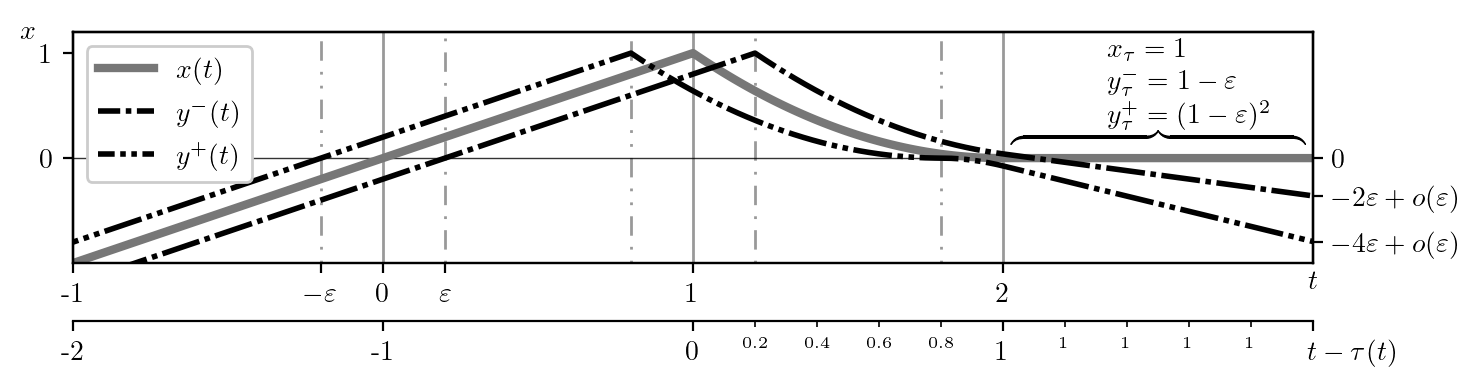

In [1068]:
# x' = -\sign(x-1)

# fig = plt.figure(figsize=(5, 2.5),dpi=200)
fig = plt.figure(figsize=(8, 1.5),dpi=200)

gs = GridSpec(nrows=1, ncols=1)

ax  = plt.subplot(gs[0,0])
ax2 = ax.twiny()




ax.set_ylim(-1, 1.2)
ax.set_xlim(-1, 3)

# N = 10
# L = 4
# xs = np.linspace(0, L, L*N+1)
# for i in range(L*N+1):
#     lw = 1
#     alpha = 0.2
#     ax.plot([0, xs[i]/2], [xs[i], xs[i]/2], c='k', lw=lw, alpha=alpha)
#     ax.plot([0, -1], [xs[i], xs[i]], c='k', lw=lw, alpha=alpha)
#     ax.plot([xs[i], 3], [xs[i], xs[i]], c='k', lw=lw, alpha=alpha)
    
#     ax.plot([0, -xs[i]/2], [-xs[i], -xs[i]/2], c='k', lw=lw, alpha=alpha)
#     ax.plot([0, 3], [-xs[i], -xs[i]], c='k', lw=lw, alpha=alpha)
#     ax.plot([-xs[i], -1], [-xs[i], -xs[i]], c='k', lw=lw, alpha=alpha)

    
epsilon = 0.2

t = np.linspace(1,2, 100)



x0, = ax.plot(np.concatenate((np.array([-1]), t, np.array([3]))), 
              np.concatenate(([-1], (t-2)**2, [0])), c='#777777', lw=3, label="$x(t)$")


# x0, = ax.plot(*np.array([(-1,1), (1,1), (2,0), (3,0)]).T, c='#777777', lw=3, label="$x(t)$")

t1 = np.linspace(1+epsilon, 2, 100)
t2 = np.linspace(2, 3, 100)
x1, = ax.plot(
    np.concatenate((np.array([-1]), t1, t2)), 
    np.concatenate(([-1-epsilon], (t1-2-epsilon)**2, epsilon**2 - 2*epsilon*(t2-2))),
                          c='k', lw=2, linestyle=(-5, (1,1,7,1)), label="$y^{+}(t)$")

t1 = np.linspace(1-epsilon, 2-epsilon, 100)
t2 = np.linspace(2-epsilon, 2, 100)
t3 = np.linspace(2, 3, 100)
x2, = ax.plot(
    np.concatenate((np.array([-1]), t1, t2, t3)), 
    np.concatenate(([-1+epsilon], (t1-2+epsilon)**2, -2*(t2-2+epsilon) + 2/3*(t2-3+epsilon)**3 + 2/3 ,-2*epsilon**2 + 2/3*epsilon**3 - 2*(2*epsilon - epsilon**2)*(t3-2))),
                          c='k', lw=2, linestyle=(-2, (1,1,1,1,7,1)), label="$y^{+}(t)$")


# -2*(t2-2+epsilon) + 2/3*(t2-3+epsilon)**3 + 2/3
# -2*epsilon**2 + 2/3*epsilon**3 - 2*(2*epsilon - epsilon**2)*(t3-2)

ax3 = ax.twinx()
ax3.set_yticks([epsilon**2 - 2*epsilon*(3-2), -2*epsilon**2 + 2/3*epsilon**3 - 2*(2*epsilon - epsilon**2)*(3-2), 0], labels=["$-2 \\varepsilon + o(\\varepsilon)$", "$-4 \\varepsilon + o(\\varepsilon)$", 0])
ax3.set_ylim(-1, 1.2)

# # ax.plot(*np.array([(-1,1 - epsilon), (1,1 - epsilon), (2-epsilon, 0), (3,0)]).T, c='w', lw=1, linestyle='solid')
# x2, = ax.plot(*np.array([(-1,1 - epsilon), (1,1 - epsilon), (2-epsilon, 0), (3,0)]).T, 
#               c='k', lw=2, linestyle=(-3, (1,1,1,1,7,1)), label="$y^{-}(t)$")

# colors = ['k', 'b', 'r', 'lime', 'orange']
# h = 0
# ticks = []
# ticklabels = []
# for k in range(40):
#     ts = []
#     xs = []
#     ax.axhline(h,c='k',lw=1)
#     ticks.append(h)
#     # ticklabels.append()
    
#     if k < 20:
#         ax.text(-0.01, h, f"$k = {k}$", va="center", ha="right", fontsize = 60*0.8**k, alpha = 0.95**k)
    
#     for i in range(0, (4*k+1)*6, 4):
#         ts += [(i -1)/(4*k+1), (i+1)/(4*k+1)]
#         xs += [h+(-1)/(4*k+1), h+(1)/(4*k+1)]
#     ax.plot(ts, xs, c='k', lw=10/(1+0.3*k))
#     h += 1/(4*k+1)+1/(4*k+1+4)+0.1/(1+0.3*k)
    
# ax.axhline(0,c='k',lw=1, alpha=0.8,zorder=-10)
for x in [0,1,2]:
    ax.axvline(x,c='k',lw=1, alpha=0.4,zorder=-10)
    
for x in [0-epsilon,1-epsilon,2-epsilon]:
    ax.axvline(x,c='k',lw=1, linestyle=(0,(1,4,1,4,7,4)), alpha=0.4,zorder=-10)
    
for x in [0+epsilon,1+epsilon]:
    ax.axvline(x,c='k',lw=1, linestyle=(0,(1,4,7,4)), alpha=0.4,zorder=-10)

ax.axhline(0,c='k',lw=0.5, alpha=0.8,zorder=-10)
# ax.axhline(1,c='k',lw=0.5, alpha=0.8,zorder=-10)
# ax.plot([-10,10],[-10,10],c='k',lw=1, alpha=0.8)
# ax.set_aspect('equal', 'box')
# ax.plot([0, 1], [0, 1])

ax.set_yticks([0, 1], labels=[0,1])
ax.set_xticks([-1, 0, 1, 2,epsilon, -epsilon], labels=[-1, 0,1, 2, r"$\varepsilon$", r"$-\varepsilon$"])

ax.text(2.5,0.,"$\\overbrace{\\hspace{10.7em}}$", 
        ha="center", va='bottom')
ax.text(2.335,0.27,"$x_\\tau = 1$\n$y^-_\\tau = 1 - \\varepsilon$\n$y^+_\\tau = (1 - \\varepsilon)^2$", 
        ha="left", va='bottom')
# ax.annotate("$t = 2 - \\varepsilon$", xy=(2-epsilon, 0), ha='center', xytext=(2-epsilon, -0.4), arrowprops=dict(arrowstyle="->"), fontsize=10)
# ax.annotate("$t = 1 + \\varepsilon/2$", xy=(1+epsilon/2, 1+epsilon/2), va='center', xytext=(1.5, 1+epsilon/2), arrowprops=dict(arrowstyle="->"), fontsize=10)
# ax.annotate("$t = 2 + \\varepsilon/2$", xy=(2+epsilon/2, epsilon/2), ha='center', xytext=(2+epsilon/2, 0.7), arrowprops=dict(arrowstyle="->"), fontsize=10)
    
    
ax.text(1, -0.03, "$t$", transform=ax.transAxes, va="top", ha="center")
ax.text(-0.03, 1.0,  "$x$", transform=ax.transAxes, va="center", ha="right")
# ax.set_xlim(0, 4)
# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))


# ax.tick_params(axis='both', labelsize=60)

# N = 10

# ax.tick_params(labelleft=False, left=False)
# ax.set_yticks(ticks)
# ax.margins(y=0.0)
# ax.set_xlabel("$t$", fontsize=60)
# ax.dataLim.y0 = -1.05

# ax.set_xlabel("$x_1$",loc="right",labelpad=12, va="bottom", )
# ax.set_ylabel("$x_2$",loc="right",labelpad=0, va="bottom")


# set_ticks([ax], N=5)
# set_labels(ax, "$t$", "$x(t)$")





a_val = 0.6

# circ1 = Patch(facecolor="w",edgecolor='#AAAAAA',hatch=r'\\\\',label='$b > 0$')
# circ2= Patch(facecolor="w", edgecolor='#AAAAAA',hatch='----',label='$b < 0$')
x1, = ax.plot([0],[0],c='k', lw=2, linestyle=(0, (4,1,1,1,7,1)), label="$y^{-}(t)$")
x2, = ax.plot([0],[0],c='k', lw=2, linestyle=(0, (3,1,1,1,1,1,7,1)), label="$y^{+}(t)$")
ax.legend(handles = [x0,x1,x2],loc=2,framealpha=1)

ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.25))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.set_xticks([-1, 0, 1, 2, 3], labels=[-2, -1, 0, 1, ""])
ax2.text(0.995, -0.33, "$t - \\tau(t)$", transform=ax.transAxes, va="top", ha="left")
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.set_xticks([1.2,1.4,1.6, 1.8, 2.2,2.4, 2.6, 2.8], labels=[0.2, 0.4, 0.6, 0.8, 1, 1, 1, 1], minor=True, fontsize=6)
ax2.set_xlim(-1,3)


plt.savefig(f"output_img/DegeneracyPropagation.pdf", format="pdf", dpi=100,bbox_inches='tight',pad_inches=0.01,transparent=True)
